In [1]:
import math
from typing import Union

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def significance_test(data1: Union[pd.Series, np.ndarray],
                      data2: Union[pd.Series, np.ndarray],
                      threshold: float = 0.05) -> (str, float):
    """
    2つの分布の有意性を検定する．
    シャピロ・ウィルク検定を用いて正規性があるかどうかを判定 -> 正規性があればバートレット検定を用いて等分散性を判定
    -> 等分散性が見られればスチューデントのt検定，見られなければウェルチのt検定を用いる -> 正規性がなければマン・ホイットニーのU検定を用いる

    Parameters
    ----------
    data1 : pd.DataFrame
        比較したいデータのうちの1つ．
    data2 : pd.DataFrame
        比較したいデータのもう1つ．
    threshold : float
        検定を行う際の信頼区間に対する閾値．

    Returns
    -------
    method : str
        使用した検定手法．
    value : float
        検定結果のp値．
    """
    # Shapiro-Wilk testによって正規性を検定する．
    # p値が閾値よりも小さければ正規性がないことを示す．
    is_normality = False

    _, shapiro1 = stats.shapiro(data1)
    _, shapiro2 = stats.shapiro(data2)

    if shapiro1 < threshold:
        print("data1 is'nt normality.")
    else:
        print("data1 is normality.")

    if shapiro2 < threshold:
        print("data2 isn't normality.")
    else:
        print("data2 is normality.")

    if (shapiro1 > threshold) & (shapiro2 > threshold):
        is_normality = True

    # バートレット検定によって等分散性を検定する．
    if is_normality:
        _, f_value = stats.bartlett(data1, data2)
        # 等分散性が見られればスチューデントのt検定を用いる
        # 見られなければウェルチのt検定を用いる．
        # p値が閾値よりも小さければ等分散性がないことを示す．
        if f_value < threshold:
            print("There isn't homoscedasticity between data1 and data2")
            _, t_value = stats.ttest_ind(data1, data2, equal_var=False)  # Welchのt検定
            #  p値が閾値よりも小さければ有意差があることを示す．
            if t_value < threshold:
                print(f"There is significance between data1 and data2(threshold={threshold})")
            else:
                print(f"There isn't significance between data1 and data2(threshold={threshold})")
            return ('Welch', t_value)

        else:
            print("There is homoscedasticity between data1 and data2")
            _, t_value = stats.ttest_ind(data1, data2)  # Studentのt検定
            #  p値が閾値よりも小さければ有意差があることを示す．
            if t_value < threshold:
                print(f"There is significance between data1 and data2(threshold={threshold})")
            else:
                print(f"There isn't significance between data1 and data2(threshold={threshold})")
            return ('Student', t_value)

    # 正規性が見られなければMann-WhitneyのU検定を用いる．
    else:
        _, u_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        # p値が閾値よりも小さければ優位性があることを示す
        if u_value < threshold:
            print(f"There is significance between data1 and data2(threshold={threshold})")
        else:
            print(f"There isn't significance between data1 and data2(threshold={threshold})")
        return ('Mann-Whitney', u_value)

In [3]:
def sturges_rule(n: int) -> int:
    return math.ceil(1 + np.log2(n))

In [4]:
def plot_two_dist(data1: Union[pd.Series, np.ndarray],
                  data2: Union[pd.Series, np.ndarray]) -> None:
    bins = sturges_rule(len(data1))
    plt.figure(figsize=(12, 8))
    plt.hist(data1, bins=bins, color='red', alpha=0.5, label="data1")
    plt.hist(data2, bins=bins, color='green', alpha=0.5, label="data2")
    plt.tight_layout()
    plt.legend()
    plt.show()

In [5]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 2, 1000)

significance_test(data1, data2)

data1 is normality.
data2 is't normality.
There isn't significance between data1 and data2(threshold=0.05)


('Mann-Whitney', 0.19473468458548393)

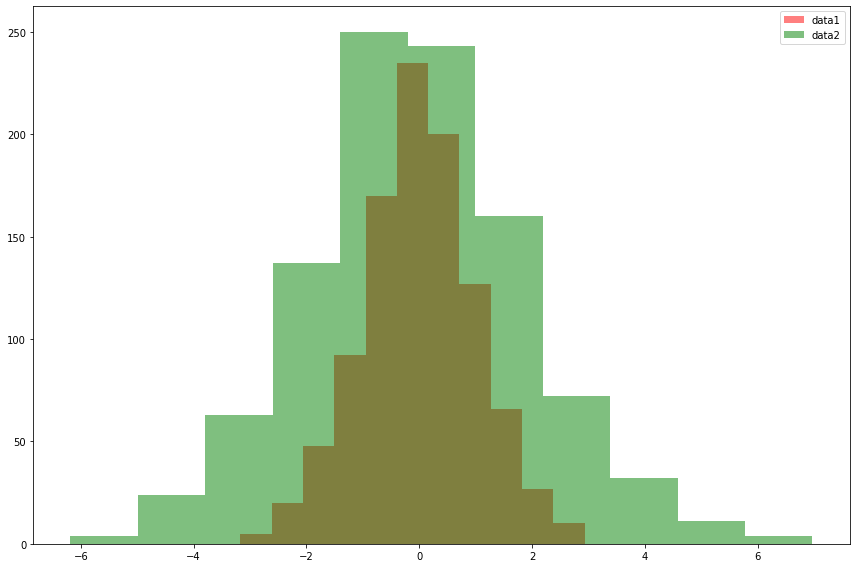

In [6]:
plot_two_dist(data1, data2)